In [25]:
import requests
import re
import csv
import pandas as pd
import datetime

from docx import Document
from docx.shared import Inches
from time import sleep
from dateutil.parser import parse
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

%matplotlib inline

In [63]:
from pandas.tseries.offsets import BDay
today = pd.datetime.today()
csv_date = today - BDay(1)
csv_date = csv_date.strftime('%Y%m%d')
csv_date

/home/abhishek/py_env/sec/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


'20201002'

In [ ]:
#x = requests.get('https://healthdata.gov/dataset/covid-19-estimated-patient-impact-and-hospital-capacity-state/resource/2e53c415-5cbe-440a')
#txt = x.text
y = re.search('https://healthdata.gov/sites/default/files/estimated_inpatient_all_' + csv_date + '_(.*).csv" type' 
sr_no_1 = y.group(1)              

In [ ]:
#xx = requests.get('https://healthdata.gov/dataset/covid-19-reported-patient-impact-and-hospital-capacity-state/resource/38e07d07-40a2-4749#{}')
txt1 = xx.text
yy = re.search('https://healthdata.gov/sites/default/files/reported_hospital_utilization_' + csv_date + '_(.*).csv" type' , txt1)
sr_no_2 = yy.group(1)

In [113]:
source_csv = [('https://healthdata.gov/sites/default/files/estimated_inpatient_all_' + csv_date + '_' + sr_no_1 + '.csv'),
            ('https://healthdata.gov/sites/default/files/estimated_inpatient_covid_' + csv_date + '_' + sr_no_1 + '.csv'),
        
            ('https://healthdata.gov/sites/default/files/reported_hospital_utilization_'+ csv_date + '_' + sr_no_2 + '.csv'),
             ] 
            #'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'

In [114]:
target_file_names = ['estimated_inpatient_all',
                     'estimated_inpatient_covid', 
                     'reported_hospital_utilization',]
                     #'Global_Mobility_Report'

target_file_names = [x + '_' + csv_date + '.csv' for x in target_file_names]
target_file_names

['estimated_inpatient_all_20201002.csv',
 'estimated_inpatient_covid_20201002.csv',
 'reported_hospital_utilization_20201002.csv']

In [118]:
i=0
for csv_addr in source_csv:
    req = requests.get(csv_addr)
    url_content = req.content

    csv_file = open(target_file_names[i], 'wb')
    csv_file.write(url_content)

    csv_file.close()
    sleep(11)
    i+=1

In [ ]:
#till now we have downloaded 3 csv files. from now on we will create matplotlib of the 3 files.

In [2]:
df = pd.read_csv('estimated_inpatient_all_20201002.csv')
df

,state,collection_date,Inpatient Beds Occupied Estimated,Count LL,Count UL,Percentage of Inpatient Beds Occupied Estimated,Percentage LL,Percentage UL,Total Inpatient Beds,Total LL,Total UL
0,CW,2020-08-31,"467,133","465,441","468,825",64.07,63.50,64.65,"710,489","708,228","712,750"
1,CW,2020-09-01,"488,584","486,475","490,692",66.50,65.78,67.22,"716,279","714,012","718,545"
2,CW,2020-09-02,"498,345","496,365","500,325",67.49,66.90,68.08,"719,792","718,014","721,571"
3,CW,2020-09-03,"496,209","494,310","498,107",67.51,66.95,68.07,"716,687","714,950","718,423"
4,CW,2020-09-04,"490,380","488,568","492,192",66.78,66.23,67.33,"715,770","714,031","717,510"
...,...,...,...,...,...,...,...,...,...,...,...
1691,WY,2020-09-29,537,528,546,35.54,32.56,38.51,"1,512","1,484","1,540"
1692,WV,2020-09-30,"3,981","3,981","3,981",73.93,73.93,73.93,"5,385","5,385","5,385"
1693,WY,2020-09-30,580,569,592,38.37,33.92,42.82,"1,512","1,467","1,557"
1694,WV,2020-10-01,"3,926","3,926","3,926",73.12,73.12,73.12,"5,369","5,369","5,369"


In [3]:
df.sort_values(["state", "collection_date"], axis=0, ascending=True, inplace=True) 
#display sorted df 
df

,state,collection_date,Inpatient Beds Occupied Estimated,Count LL,Count UL,Percentage of Inpatient Beds Occupied Estimated,Percentage LL,Percentage UL,Total Inpatient Beds,Total LL,Total UL
448,AK,2020-08-31,870,870,870,41.06,41.06,41.06,"1,281",740,"1,822"
451,AK,2020-09-01,913,913,913,42.70,42.70,42.70,"1,281",849,"1,713"
454,AK,2020-09-02,913,913,913,42.62,42.62,42.62,"1,281",860,"1,702"
457,AK,2020-09-03,930,928,931,45.91,45.14,46.68,"1,210",802,"1,618"
460,AK,2020-09-04,908,904,911,44.42,41.83,47.01,"1,210",802,"1,618"
...,...,...,...,...,...,...,...,...,...,...,...
1687,WY,2020-09-27,553,553,553,36.57,36.57,36.57,"1,512","1,512","1,512"
1689,WY,2020-09-28,480,478,483,31.78,29.94,33.62,"1,512","1,488","1,536"
1691,WY,2020-09-29,537,528,546,35.54,32.56,38.51,"1,512","1,484","1,540"
1693,WY,2020-09-30,580,569,592,38.37,33.92,42.82,"1,512","1,467","1,557"


In [4]:
y_state_1 = df[df.state=='AK']['Inpatient Beds Occupied Estimated']
y_state_2 = df[df.state=='AR']['Inpatient Beds Occupied Estimated']

In [5]:
tt = [float(x.replace(',' , '')) for x in y_state_1.values] 
gg = [float(x.replace(',' , '')) for x in y_state_2.values] 

In [6]:
x_dates = df[df.state=='AK']['collection_date']

In [7]:
x_dates.values

array(['2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03',
       '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07',
       '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
       '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15',
       '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19',
       '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23',
       '2020-09-24', '2020-09-25', '2020-09-26', '2020-09-27',
       '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01'],
      dtype=object)

/home/abhishek/py_env/sec/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


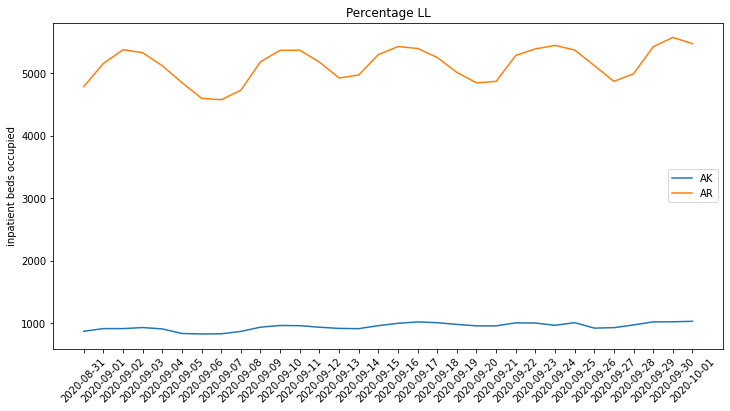

In [47]:
fig, ax = plt.subplots(figsize=(12,6))



plt.plot(x_dates.values, tt, label = "AK")
plt.plot(x_dates.values, gg, label = "AR")

plt.title("Percentage LL")
plt.legend()
plt.ylabel("inpatient beds occupied")



#date_form = DateFormatter("%b'%Y")
#ax.xaxis.set_major_formatter(date_form)
ax.set_xticklabels(x_dates.values, rotation = (45))
#ax.set_xticks(range(0, len(x_dates.values), 60))

plt.savefig("sample_chart1.png")
plt.show()

In [9]:
y_state_1.values

array(['870', '913', '913', '930', '908', '835', '827', '830', '868',
       '936', '963', '960', '935', '916', '912', '960', '998', '1,020',
       '1,008', '980', '957', '957', '1,005', '1,002', '966', '1,008',
       '921', '928', '972', '1,021', '1,022', '1,030'], dtype=object)

In [10]:
y_state_2.values

array(['4,786', '5,158', '5,376', '5,329', '5,120', '4,851', '4,599',
       '4,576', '4,729', '5,184', '5,367', '5,369', '5,179', '4,925',
       '4,972', '5,299', '5,427', '5,397', '5,253', '5,014', '4,847',
       '4,870', '5,286', '5,390', '5,446', '5,372', '5,123', '4,870',
       '4,993', '5,425', '5,573', '5,474'], dtype=object)

/home/abhishek/py_env/sec/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


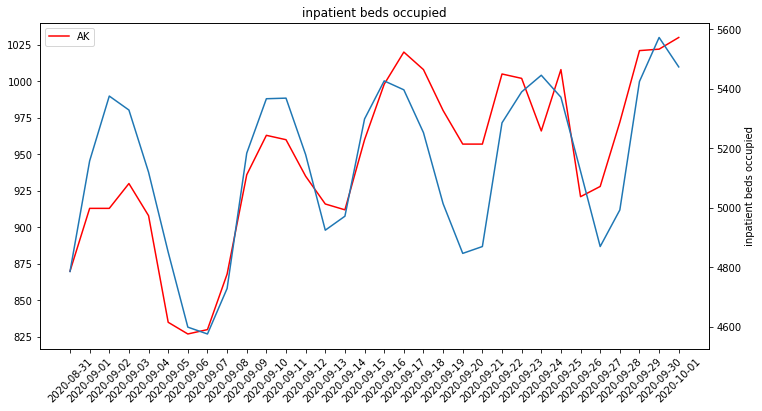

In [48]:
fig, ax1 = plt.subplots(figsize=(12,6))



ax1.plot(x_dates.values, tt, label = "AK", color = 'red')

ax2 = ax1.twinx()

ax2.plot(x_dates.values, gg, label = "AR")

plt.title("inpatient beds occupied")

ax1.legend()
#ax2.legend(loc=0)

plt.ylabel("inpatient beds occupied")



#date_form = DateFormatter("%b'%Y")
#ax.xaxis.set_major_formatter(date_form)
ax1.set_xticklabels(x_dates.values, rotation = (45))
#ax.set_xticks(range(0, len(x_dates.values), 60))


plt.savefig("sample_chart2.png")
plt.show()

In [62]:
# chart in table form

from docx import Document

document = Document()
tables = document.tables
table = document.add_table(rows=1, cols=2)
row_cells = table.add_row().cells

for i, image in enumerate(['sample_chart1.png', 'sample_chart2.png']):
    paragraph = row_cells[i].paragraphs[0]
    run = paragraph.add_run()
    run.add_picture(image, width=Inches(2))
document.save('doc1.docx')

In [60]:
# chart one below the other

from docx import Document
from docx.shared import Inches
#from docx.enum.section import WD_ORIENT

document = Document()
#section.orientation = WD_ORIENT.LANDSCAPE


document.add_heading('Charts', 0)

document.add_picture('sample_chart1.png', width=Inches(5))
document.add_picture('sample_chart2.png', width=Inches(5))

document.save('doc2.docx')